# Лабораторная работа 3. Морфологические преобразования

Морфологические преобразования

Следует реализовать выделение проблемных зубьев у шестеренки. Пример разобран на лекции.

Описание есть у Стокмана.

Использовать только морфологические операции для бинарных изображений.

Можно использовать для этого функции OpenCV, например:

**Erode** -- размывание(операция сужения)

**Dilate** -- растягивание(операция расширения)

In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Читаем изображение

In [4]:
imageSrs = cv2.imread("19.png")

In [5]:
def showImage(imageArray, size=(10,10)):
    plt.figure(figsize=size)
    plt.imshow(imageArray, interpolation='nearest')
    plt.show()

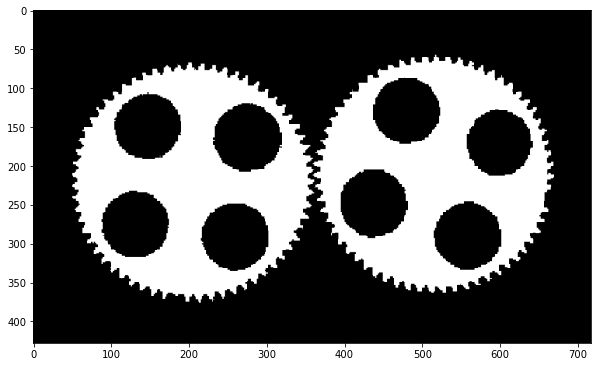

In [6]:
showImage(imageSrs)

### 1. hole_ring

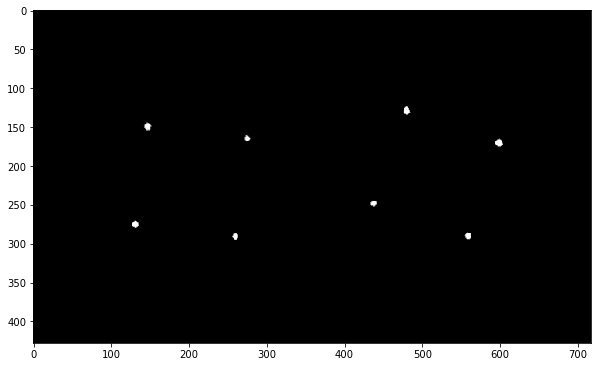

In [10]:
res = imageSrs
circle = cv2.circle(np.zeros((100, 100), 'uint8'), (50,50), 48, 255, -1)
mask = cv2.circle(np.zeros((100, 100), 'uint8'), (50,50), 50, 255, -1) - circle
res_points = cv2.erode(res, mask)
showImage(res_points)

### 2. hole_mask

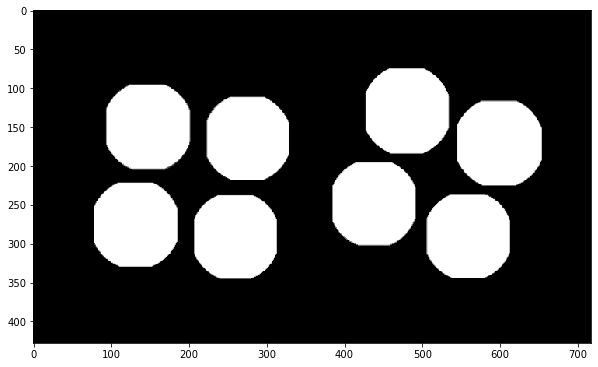

In [17]:
res = res_points
circlePoint = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 54, 255, -1)
#maskPoint = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 53, 255, -1) - circlePoint
imagePoint = cv2.dilate(res, circlePoint)
showImage(imagePoint)

### 3. gear_body

In [18]:
def mergingImage(image1, image2):
    width = image1.shape[1]
    height = image1.shape[0]
    newImage = image1.copy()
    
    whiteColor = [255, 255, 255]
    blackColor = [0, 0, 0]
    
    for i in range(height):
        for j in range(width):
            if image1[i, j][0] == 255 or image2[i, j][0]:
                newImage[i, j] = whiteColor
            else:
                newImage[i, j] = blackColor
    return newImage

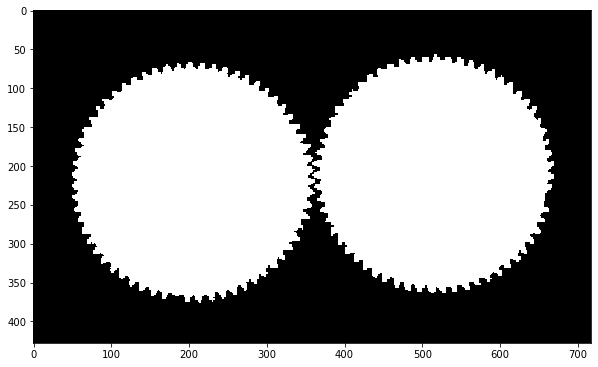

In [19]:
res = mergingImage(imagePoint, imageSrs)

showImage(res)

### 4. sampling_ring_spacer

### 5. sampling_ring_width

### 6. tip_spacing

### 7. defect_cue